## Импорт библиотек

In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

## Подготовка преобразований данных

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

## Загрузка и предварительная обработка данных

In [3]:
train_dataset = datasets.FashionMNIST(
    root="./data", train=True, download=True, transform=transform
)
test_dataset = datasets.FashionMNIST(
    root="./data", train=False, download=True, transform=transform
)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

## Загрузка нескольких изображений и их меток

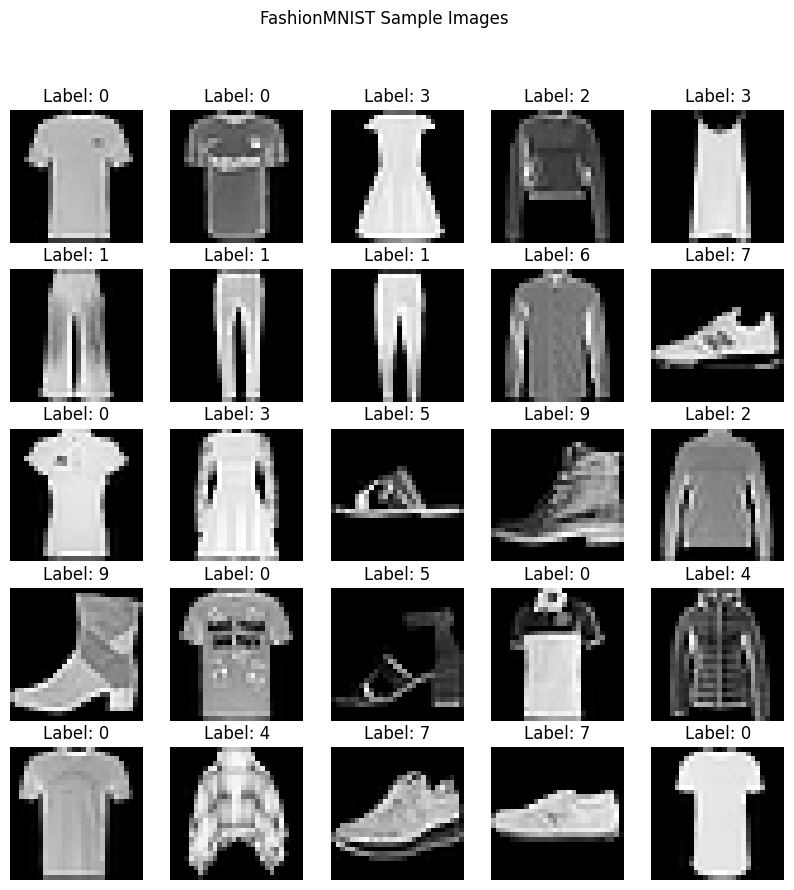

In [4]:
def plot_images(images, labels, title):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i][0], cmap='gray')
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

sample_images, sample_labels = next(iter(train_loader))
plot_images(sample_images, sample_labels.numpy(), "FashionMNIST Sample Images")

## Определение архитектуры полносвязной нейронной сети

In [5]:
class FashionNN(nn.Module):
    def __init__(self):
        super(FashionNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)  # Увеличиваем количество нейронов
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 10)  # 10 классов одежды
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)  # Регуляризация через Dropout

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Преобразование изображения в вектор
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

## Обучение модели

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FashionNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Используем Adam оптимизатор

num_epochs = 30  # Определяем число эпох

for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [1/30], Loss: 0.5767
Epoch [2/30], Loss: 0.4466
Epoch [3/30], Loss: 0.2951
Epoch [4/30], Loss: 0.2542
Epoch [5/30], Loss: 0.1967
Epoch [6/30], Loss: 0.3163
Epoch [7/30], Loss: 0.3728
Epoch [8/30], Loss: 0.3139
Epoch [9/30], Loss: 0.3870
Epoch [10/30], Loss: 0.4748
Epoch [11/30], Loss: 0.2816
Epoch [12/30], Loss: 0.5271
Epoch [13/30], Loss: 0.4295
Epoch [14/30], Loss: 0.2179
Epoch [15/30], Loss: 0.4289
Epoch [16/30], Loss: 0.3943
Epoch [17/30], Loss: 0.0896
Epoch [18/30], Loss: 0.3304
Epoch [19/30], Loss: 0.2319
Epoch [20/30], Loss: 0.2609
Epoch [21/30], Loss: 0.4105
Epoch [22/30], Loss: 0.2488
Epoch [23/30], Loss: 0.2125
Epoch [24/30], Loss: 0.3818
Epoch [25/30], Loss: 0.1844
Epoch [26/30], Loss: 0.2885
Epoch [27/30], Loss: 0.2702
Epoch [28/30], Loss: 0.2072
Epoch [29/30], Loss: 0.2464
Epoch [30/30], Loss: 0.3677


## Оценка производительности модели

In [7]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Точность на тестовой выборке: {accuracy:.2f}%")

Точность на тестовой выборке: 88.95%
